In [48]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from eqUtils import *

## Get data from usgs.gov

In [3]:
df = pd.read_csv('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv')

### Parameters

In [30]:
# Lindsborg location, lat and long, degrees
centerLat = 38.5735
centerLong = -97.6745


### Distances

This is from sites about great circle distances:
- http://edwilliams.org/avform147.htm
- https://en.wikipedia.org/wiki/Great-circle_distance

In [26]:
def gcDist(centerLat, centerLong, ptLat, ptLong):
    '''Function to return great circle distance on earth, given center lat and long, point lat and long, all in degrees '''
    # go to radians
    cLat = centerLat * math.pi / 180.0
    cLong = centerLong * math.pi / 180.0
    pLat = ptLat * math.pi / 180.0
    pLong = ptLong * math.pi / 180.0

    # radius of earth, km
    rad = 6371.0

    # great circle formula
    dLambda = cLong - pLong
    dPhi = cLat - pLat

    drad = 2.0 * math.asin(math.sqrt( math.sin(dPhi/2.0)**2 + (1.0 - math.sin(dPhi/2.0)**2 - (math.sin((cLat+pLat)/2.0)**2) ) * (math.sin(dLambda/2.0)**2)  ) )

    # distance
    return drad * rad

In [39]:
def gcDistpd(centerLat, centerLong, dataFile):
    '''Function to return great circle distance on earth, given center lat and long, datafile with point lat and long, all in degrees '''
    # go to radians
    cLat = np.full(len(dataFile), centerLat * math.pi / 180.0)
    cLong = np.full(len(dataFile),centerLong * math.pi / 180.0)
    pLat = (dataFile['latitude'] * math.pi / 180.0).to_numpy()
    pLong = (dataFile['longitude'] * math.pi / 180.0).to_numpy()

    # radius of earth, km
    rad = 6371.0

    # great circle formula
    dLambda = cLong - pLong
    dPhi = cLat - pLat

    drad = 2.0 * np.arcsin(np.sqrt( np.sin(dPhi/2.0)**2 + (1.0 - np.sin(dPhi/2.0)**2 - (np.sin((cLat+pLat)/2.0)**2) ) * (np.sin(dLambda/2.0)**2)  ) )

    # distance
    return drad * rad

## Filter

Get the events within a radius

In [44]:
# radius, km
radius = 30

df.loc[gcDistpd(centerLat, centerLong, df)<= radius]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
180,2021-12-15T18:17:48.920Z,38.6595,-97.4981,5.00,3.1,mb_lg,NaN,74.0,0.715,0.78,...,2021-12-16T13:02:21.380Z,"7 km SW of Gypsum, Kansas",earthquake,3.8,2.0,0.051,101.0,reviewed,us,us
233,2021-12-15T15:03:08.658Z,38.6521,-97.5101,5.00,3.4,ml,NaN,84.0,0.703,0.25,...,2021-12-15T20:12:16.188Z,"8 km ESE of Assaria, Kansas",earthquake,2.7,1.9,0.148,6.0,reviewed,us,us
284,2021-12-15T09:58:21.667Z,38.6822,-97.4441,3.00,4.0,mwr,NaN,61.0,0.758,0.56,...,2021-12-16T13:03:22.653Z,"2 km SSW of Gypsum, Kansas",earthquake,2.6,1.9,0.041,56.0,reviewed,us,us
405,2021-12-14T22:02:29.520Z,38.6528,-97.4522,5.00,2.5,mb_lg,NaN,140.0,0.730,0.36,...,2021-12-15T13:22:46.647Z,"6 km SSW of Gypsum, Kansas",earthquake,1.8,2.0,0.147,12.0,reviewed,us,us
835,2021-12-12T23:19:37.992Z,38.6546,-97.5039,5.00,2.5,mb_lg,NaN,141.0,0.708,0.40,...,2021-12-13T22:18:34.194Z,"8 km SW of Gypsum, Kansas",earthquake,2.9,1.9,0.109,22.0,reviewed,us,us
1030,2021-12-12T02:09:24.161Z,38.6752,-97.4871,9.08,3.8,mb_lg,NaN,98.0,0.733,0.57,...,2021-12-15T10:40:24.123Z,"6 km WSW of Gypsum, Kansas",earthquake,3.5,7.1,0.039,170.0,reviewed,us,us
1045,2021-12-12T01:02:18.409Z,38.6813,-97.4928,5.00,2.5,mb_lg,NaN,143.0,0.735,0.40,...,2021-12-12T02:29:20.150Z,"6 km WSW of Gypsum, Kansas",earthquake,2.2,2.0,0.132,15.0,reviewed,us,us
1203,2021-12-11T11:18:30.864Z,38.6839,-97.4978,5.00,2.6,mb_lg,NaN,144.0,0.735,0.51,...,2021-12-11T15:01:44.815Z,"6 km WSW of Gypsum, Kansas",earthquake,2.4,2.0,0.361,2.0,reviewed,us,us
1215,2021-12-11T10:28:20.150Z,38.6948,-97.4933,2.68,3.0,mb_lg,NaN,145.0,0.746,0.24,...,2021-12-11T12:36:37.162Z,"5 km WSW of Gypsum, Kansas",earthquake,3.1,8.1,0.132,18.0,reviewed,us,us
1561,2021-12-10T01:59:05.450Z,38.6432,-97.4330,5.00,2.4,mb_lg,NaN,138.0,0.731,0.65,...,2021-12-10T07:47:36.065Z,"6 km S of Gypsum, Kansas",earthquake,2.1,2.0,0.136,14.0,reviewed,us,us


## Plot

In [63]:
x = pd.DatetimeIndex(pd.to_datetime(  df.loc[gcDistpd(centerLat, centerLong, df)<= radius]['time'] )).tz_convert("US/Central")

In [64]:
y = df.loc[gcDistpd(centerLat, centerLong, df)<= radius]['mag']

In [65]:
dates = mdates.date2num(x)

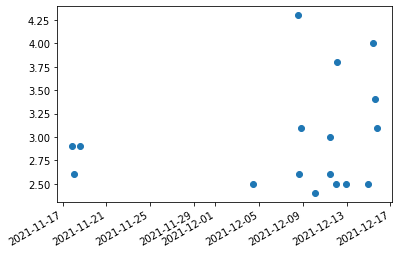

In [68]:
plt.plot_date(dates,y)
plt.gcf().autofmt_xdate()